In [2]:
import pandas as pd
import numpy as np

import matplotlib as plt
import matplotlib.pyplot as plots

import seaborn as sns
import sklearn

In [3]:
training_df = pd.read_csv('training.csv')
training_df

,StoreNumber,dayOfTheYear,3HourBucket,GrossSoldQuantity,Cash/Credit Site,EBT Site,Loyalty Site,ExtraMile Site,CoBrand,Alcohol,Carwash,Food Service,City,State
0,1000,1,1,3,False,True,True,True,No,True,False,True,HOUSTON,TX
1,1000,1,2,5,False,True,True,True,No,True,False,True,HOUSTON,TX
2,1000,1,3,6,False,True,True,True,No,True,False,True,HOUSTON,TX
3,1000,1,4,3,False,True,True,True,No,True,False,True,HOUSTON,TX
4,1000,2,1,13,False,True,True,True,No,True,False,True,HOUSTON,TX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5655,4000,362,2,20,False,False,True,True,No,False,True,True,SAN ANTONiO,TX
5656,4000,362,3,26,False,False,True,True,No,False,True,True,SAN ANTONiO,TX
5657,4000,362,4,37,False,False,True,True,No,False,True,True,SAN ANTONiO,TX
5658,4000,363,3,27,False,False,True,True,No,False,True,True,SAN ANTONiO,TX


In [19]:
def sort_month(day):
    if day <= 31:
        return 1
    elif day >= 32 and day <= 59:
        return 2
    elif day >= 60 and day <= 90:
        return 3
    elif day >= 91 and day <= 120:
        return 4
    elif day >= 121 and day <= 151:
        return 5
    elif day >= 152 and day <= 181:
        return 6
    elif day >= 182 and day <= 212:
        return 7
    elif day >= 213 and day <= 243:
        return 8
    elif day >= 244 and day <= 273:
        return 9
    elif day >= 274 and day <= 304:
        return 10
    elif day >= 305 and day <= 334:
        return 11
    elif day >= 335 and day <= 365:
        return 12

training_df['Month'] = ""
    
for i in training_df['Month']:
    training_df['Month'][i] = sort_month(training_df['dayOfTheYear'][i])

training_df

KeyError: ''

In [6]:
pivot_by_day = training_df.pivot_table(index='dayOfTheYear', columns= '3HourBucket', values= 'GrossSoldQuantity').replace(np.NaN, 0)
pivot_by_day

3HourBucket,1,2,3,4
dayOfTheYear,,,,
1,3.50,10.50,11.50,13.00
2,20.50,35.75,43.50,49.50
3,18.75,42.50,41.25,50.00
4,15.00,55.75,40.00,42.50
5,5.50,8.00,11.00,11.75
...,...,...,...,...
359,22.50,32.00,36.00,19.50
360,22.25,36.00,32.00,38.25
361,23.25,42.50,47.50,45.00


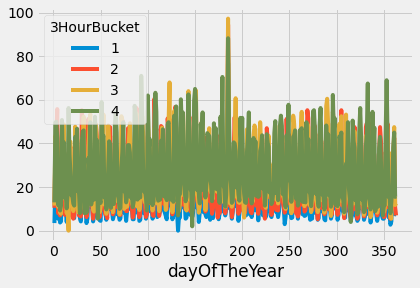

In [9]:
pivot_by_day.plot(kind='line')